In [68]:
import pandas as pd
import numpy as np
import plotly.express as px
data = pd.read_csv("Video games.csv")
data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


Clean the data as needed.

In [69]:
# A quick overview of the data
print(data.head())
print(data.info())
print(data.describe())
data.isnull().sum()

   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------  

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [70]:
#Remplacer les valeurs manquentes par le mode 
data['Year'].fillna(data['Year'].mode()[0], inplace=True)
data['Publisher'].fillna(data['Publisher'].mode()[0], inplace=True)

In [71]:
#Verifier si il n'existe aucune valeur manquante
data.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16598 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16598 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [73]:
data["Year_int"] = data["Year"].astype(int)
data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Year_int
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,2006
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,1985
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,2008
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,2009
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,1996
...,...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,2002
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,2003
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01,2008
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,2010


Create an area chart to show the trend of global sales over the years.

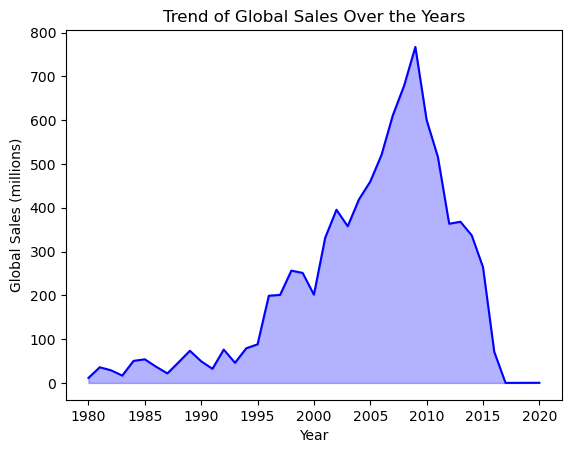

In [74]:
global_sales = data.groupby("Year_int")["Global_Sales"].sum()
plt.fill_between(global_sales.index, global_sales, color="blue", alpha=0.3)
plt.plot(global_sales.index, global_sales, color="blue")
plt.xlabel("Year")
plt.ylabel("Global Sales (millions)")
plt.title("Trend of Global Sales Over the Years")
plt.show()

Create a histogram to show the distribution of global sales

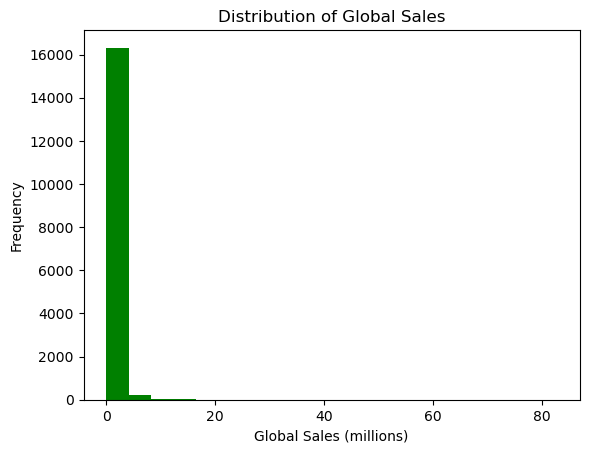

In [75]:

plt.hist(data["Global_Sales"], bins=20, color="green")
plt.xlabel("Global Sales (millions)")
plt.ylabel("Frequency")
plt.title("Distribution of Global Sales")
plt.show()

In [ ]:
#Create a scatter plot to show the relationship between North American sales and European sales

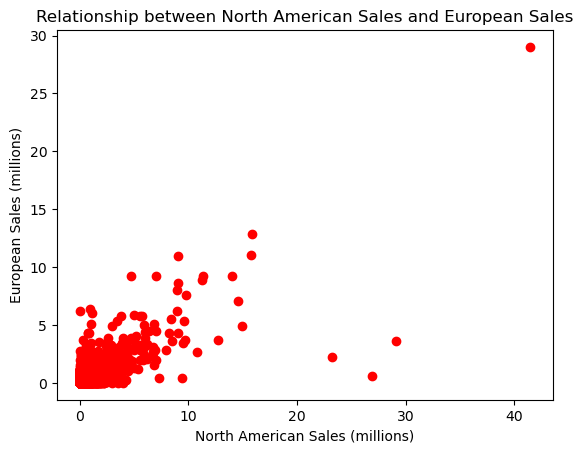

In [77]:

plt.scatter(data["NA_Sales"], data["EU_Sales"], color="red")
plt.xlabel("North American Sales (millions)")
plt.ylabel("European Sales (millions)")
plt.title("Relationship between North American Sales and European Sales")
plt.show()

Create a scatter plot to show the relationship between Japanese sales and Other sales

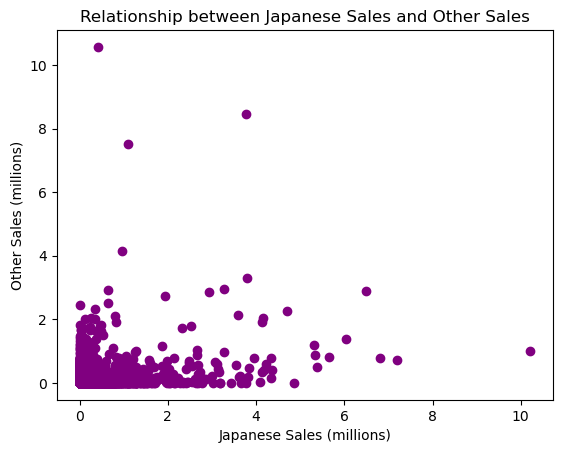

In [79]:

plt.scatter(data["JP_Sales"], data["Other_Sales"], color="purple")
plt.xlabel("Japanese Sales (millions)")
plt.ylabel("Other Sales (millions)")
plt.title("Relationship between Japanese Sales and Other Sales")
plt.show()

Create a stacked area chart to show the distribution of sales by platform over the years

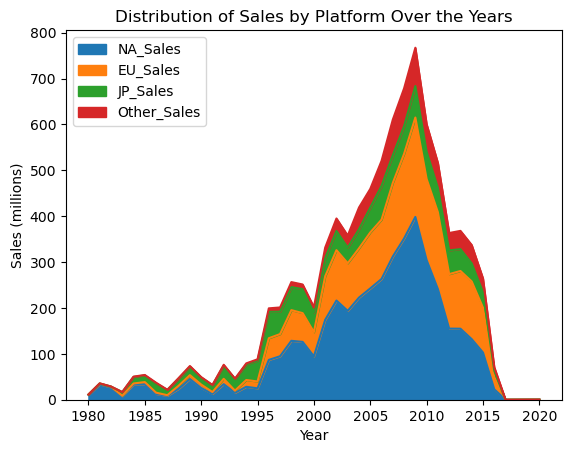

In [80]:

platform_sales = data.groupby("Year")[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].sum()
platform_sales.plot(kind="area", stacked=True)
plt.xlabel("Year")
plt.ylabel("Sales (millions)")
plt.title("Distribution of Sales by Platform Over the Years")
plt.show()

Create a bar chart to show the top 10 publishers by global sales

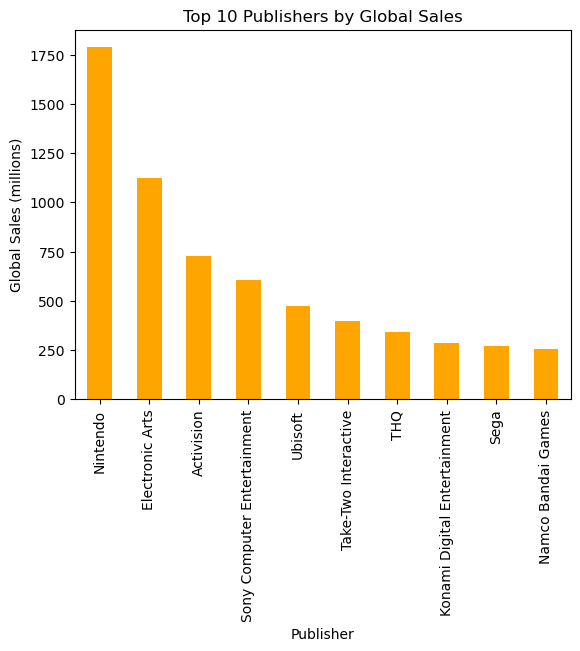

In [81]:

top_publishers = data.groupby("Publisher")["Global_Sales"].sum().sort_values(ascending=False).head(10)
top_publishers.plot(kind="bar", color="orange")
plt.xlabel("Publisher")
plt.ylabel("Global Sales (millions)")
plt.title("Top 10 Publishers by Global Sales")
plt.show()

Create a pie chart to show the distribution of genres by global sales

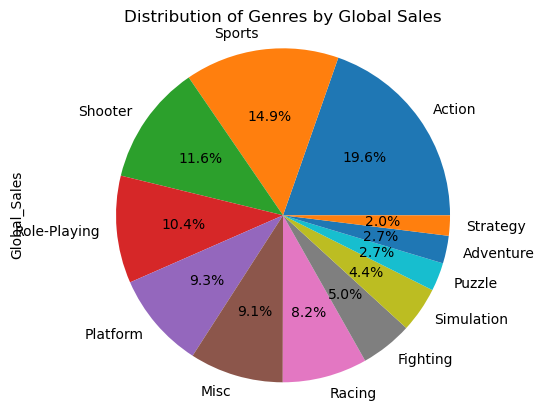

In [83]:

genre_sales = data.groupby("Genre")["Global_Sales"].sum().sort_values(ascending=False)
genre_sales.plot(kind="pie", autopct="%1.1f%%")
plt.axis("equal")
plt.title("Distribution of Genres by Global Sales")
plt.show()